## Data loading


In [8]:
import pandas as pd

try:
    df_train = pd.read_csv('/content/drive/MyDrive/Company assignments/SM Tech/train.csv')
    df_validation = pd.read_csv('/content/drive/MyDrive/Company assignments/SM Tech/validation.csv')
    df_test = pd.read_csv('/content/drive/MyDrive/Company assignments/SM Tech/test.csv')
    df_test_labels = pd.read_csv('/content/drive/MyDrive/Company assignments/SM Tech/test_labels.csv')

    print("df_train:")
    display(df_train.head())
    print(df_train.shape)

    print("\ndf_validation:")

    display(df_validation.head())
    print(df_validation.shape)

    print("\ndf_test:")
    display(df_test.head())
    print(df_test.shape)

    print("\ndf_test_labels:")
    display(df_test_labels.head())
    print(df_test_labels.shape)

except FileNotFoundError:
    print("One or more CSV files not found.")
except Exception as e:
    print(f"An error occurred: {e}")

df_train:


,id,feedback_text,toxic,abusive,vulgar,menace,offense,bigotry
0,281d77b7bebc2201,:::Sounds good. Let me know when you're done ...,0,0,0,0,0,0
1,716aac7bf3c63db1,"""\nI say something, but it didn't actually con...",0,0,0,0,0,0
2,57cb318c6edcf10c,"""Agustina Barrientos]] \n | Modelo de Piñeiro ...",0,0,0,0,0,0
3,dc3bd70118d91b3a,FYI I enjoy licking strangers scrotal sacks......,1,0,1,0,0,0
4,cf10d41f2997d233,How do you get a site?\nMany penguins have ask...,0,0,0,0,0,0


(23473, 8)

df_validation:


,id,feedback_text,lang,toxic
0,1203,İyi tamam olabilir. Balkanlar maddesini gelişt...,tr,0
1,5871,"Por dios, y la canción de John Lennon: http://...",es,1
2,3590,Selam. Öncelikle tebrik ederim... Bu arada ken...,tr,0
3,447,Leggiti tutte le discussioni. Magari cancellal...,it,1
4,6634,A LAS TOKITAS NOS VALE QUE LAS JONATICAS INSUL...,es,1


(840, 4)

df_test:


,id,content,lang
0,56496,"Bahar merhaba, Şu TV programı için bildiğin gi...",tr
1,18266,"Merhaba, başlık taşıma nedeniyle bir karışıklı...",tr
2,37852,kullanıcı ne mutlu türküm diyene yazmış ta...,tr
3,25075,Quand la plaisanterie sur le synopsis de ce fi...,fr
4,330,Não fosse seu esclarecimento no blog da Anne (...,pt


(6700, 3)

df_test_labels:


,id,toxic
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0


(6000, 2)


## Data exploration



In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Shape and Information
print("DataFrame Shapes and Information:")
print("-" * 30)
for df_name, df in zip(["df_train", "df_validation", "df_test", "df_test_labels"],
                      [df_train, df_validation, df_test, df_test_labels]):
    print(f"{df_name}:")
    print(f"Shape: {df.shape}")
    df.info()
    print("-" * 30)



DataFrame Shapes and Information:
------------------------------
df_train:
Shape: (23473, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23473 entries, 0 to 23472
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             23473 non-null  object
 1   feedback_text  23473 non-null  object
 2   toxic          23473 non-null  int64 
 3   abusive        23473 non-null  int64 
 4   vulgar         23473 non-null  int64 
 5   menace         23473 non-null  int64 
 6   offense        23473 non-null  int64 
 7   bigotry        23473 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.4+ MB
------------------------------
df_validation:
Shape: (840, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             840 non-null    int64 
 1   feedback_text  840 


Target Variable Distribution (df_train):
------------------------------
toxic:
toxic
0    0.906446
1    0.093554
Name: proportion, dtype: float64


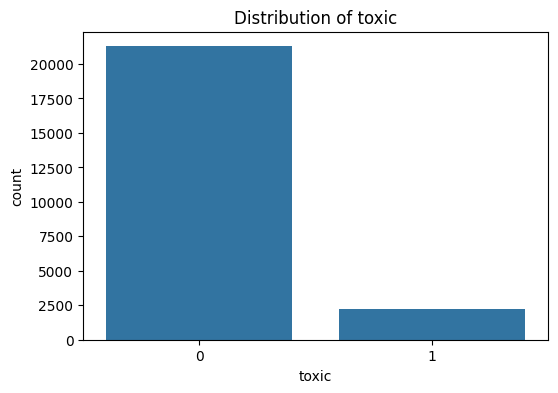

abusive:
abusive
0    0.992502
1    0.007498
Name: proportion, dtype: float64


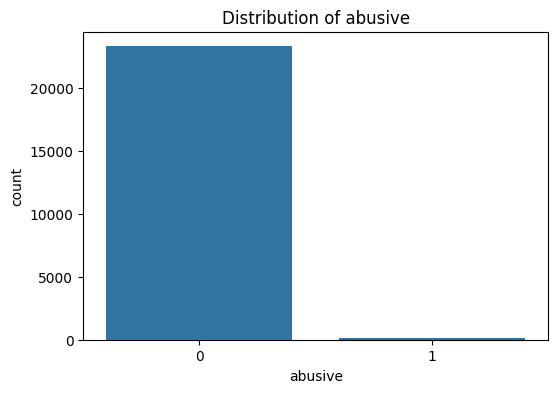

vulgar:
vulgar
0    0.945682
1    0.054318
Name: proportion, dtype: float64


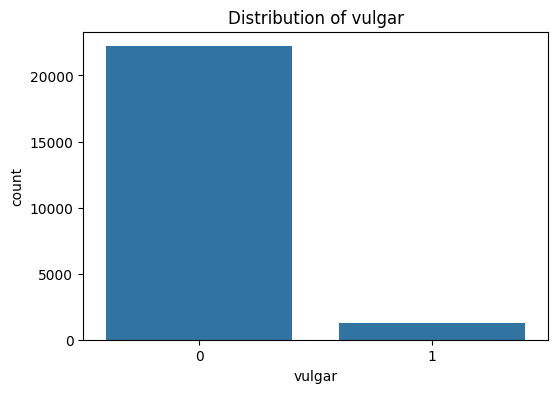

menace:
menace
0    0.997188
1    0.002812
Name: proportion, dtype: float64


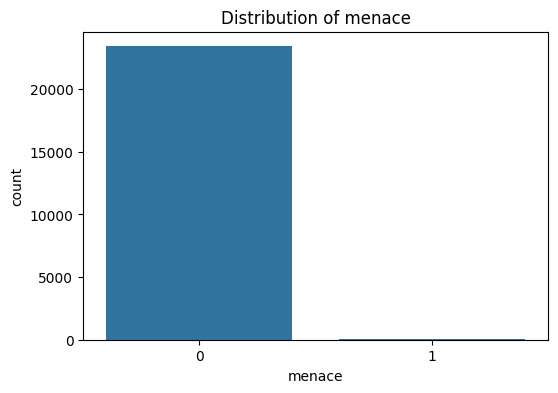

offense:
offense
0    0.951008
1    0.048992
Name: proportion, dtype: float64


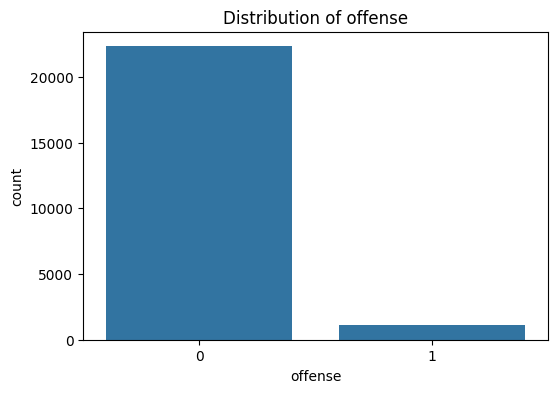

bigotry:
bigotry
0    0.991778
1    0.008222
Name: proportion, dtype: float64


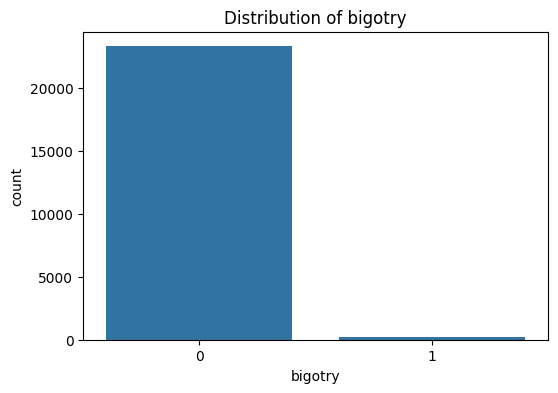

In [10]:
# Target Variable Distribution for df_train
print("\nTarget Variable Distribution (df_train):")
print("-" * 30)
target_cols = ['toxic', 'abusive', 'vulgar', 'menace', 'offense', 'bigotry']
for col in target_cols:
    print(f"{col}:")
    print(df_train[col].value_counts(normalize=True))
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df_train)
    plt.title(f"Distribution of {col}")
    plt.show()


Target Variable Distribution (df_validation and df_test_labels):
------------------------------
df_validation:
toxic:
toxic
0    0.840476
1    0.159524
Name: proportion, dtype: float64


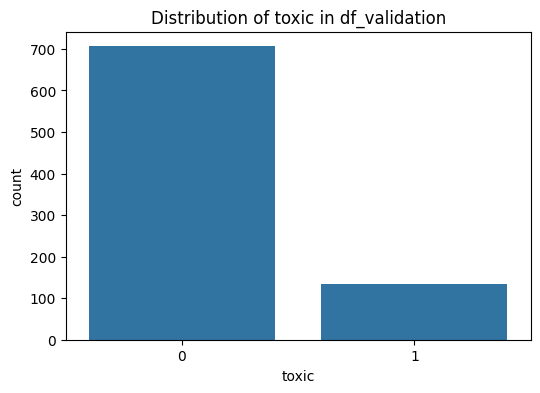

df_test_labels:
toxic:
toxic
0    0.772833
1    0.227167
Name: proportion, dtype: float64


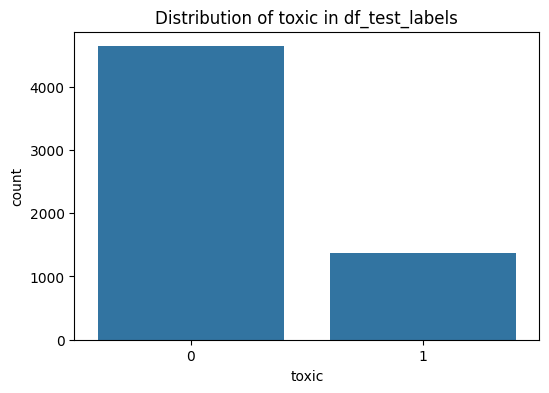

In [11]:
# Target Variable Distribution for df_validation and df_test_labels
print("\nTarget Variable Distribution (df_validation and df_test_labels):")
print("-" * 30)
for df_name, df in zip(["df_validation", "df_test_labels"],
                      [df_validation, df_test_labels]):
    print(f"{df_name}:")
    print(f"toxic:")
    print(df["toxic"].value_counts(normalize=True))
    plt.figure(figsize=(6, 4))
    sns.countplot(x="toxic", data=df)
    plt.title(f"Distribution of toxic in {df_name}")
    plt.show()


Text Data Analysis:
------------------------------
df_train:
Average text length: 402.0297362927619
Minimum text length: 6
Maximum text length: 5000


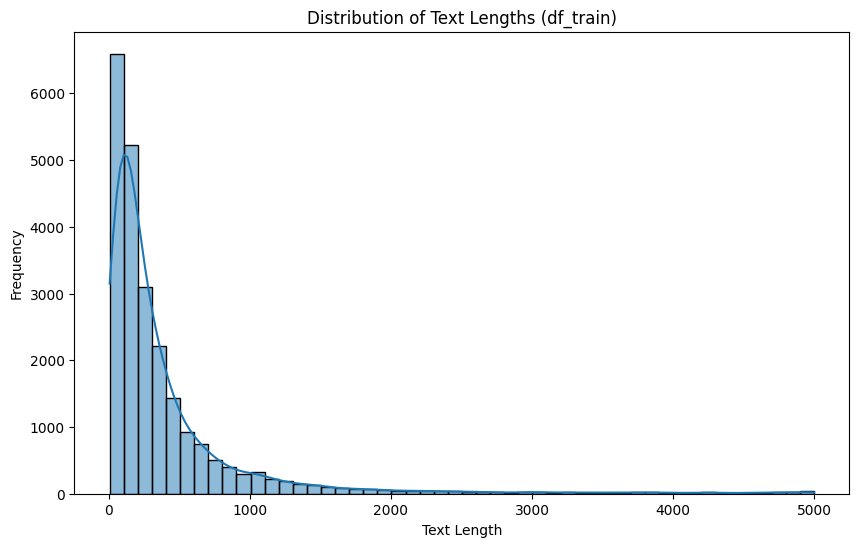

df_validation:
Average text length: 368.30357142857144
Minimum text length: 78
Maximum text length: 1550


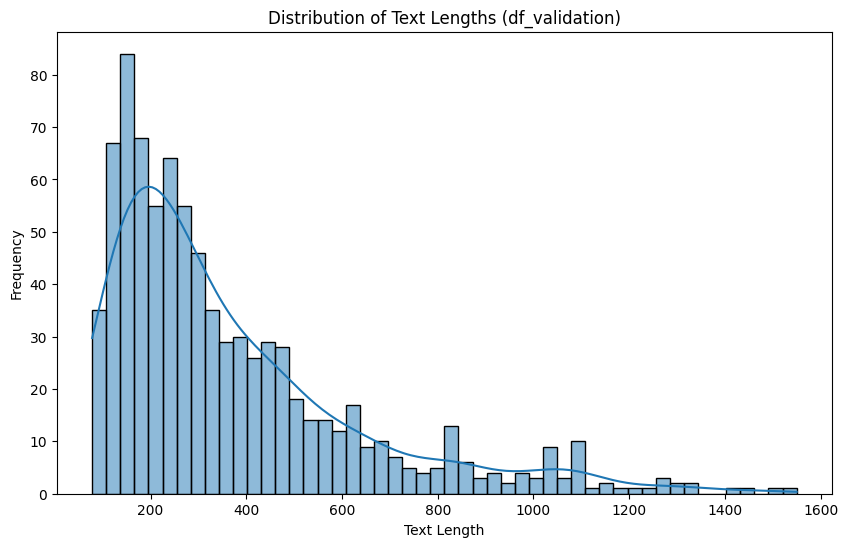

In [12]:
# Text Data Analysis
print("\nText Data Analysis:")
print("-" * 30)
for df_name, df in zip(["df_train", "df_validation"], [df_train, df_validation]):
    print(f"{df_name}:")
    df['text_length'] = df['feedback_text'].str.len()
    print(f"Average text length: {df['text_length'].mean()}")
    print(f"Minimum text length: {df['text_length'].min()}")
    print(f"Maximum text length: {df['text_length'].max()}")
    plt.figure(figsize=(10, 6))
    sns.histplot(df['text_length'], bins=50, kde=True)
    plt.title(f"Distribution of Text Lengths ({df_name})")
    plt.xlabel("Text Length")
    plt.ylabel("Frequency")
    plt.show()


Correlation Analysis (df_train):
------------------------------


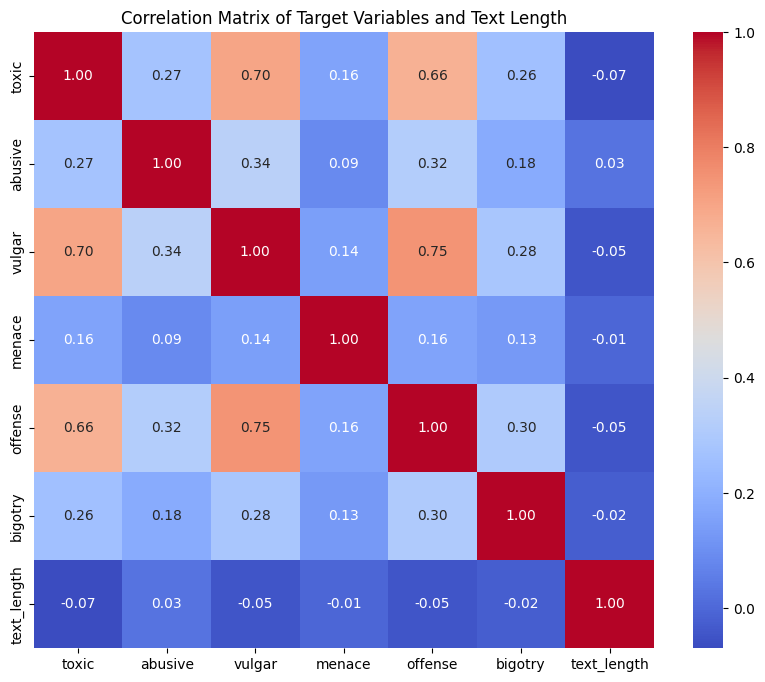

In [13]:
# Correlation Analysis (df_train)
print("\nCorrelation Analysis (df_train):")
print("-" * 30)
plt.figure(figsize=(10,8))
sns.heatmap(df_train[target_cols + ['text_length']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Target Variables and Text Length")
plt.show()

In [14]:
# Missing Values
print("\nMissing Values:")
print("-" * 30)
for df_name, df in zip(["df_train", "df_validation", "df_test", "df_test_labels"],
                      [df_train, df_validation, df_test, df_test_labels]):
    print(f"{df_name}:")
    print(df.isnull().sum())
    print("-" * 30)


Missing Values:
------------------------------
df_train:
id               0
feedback_text    0
toxic            0
abusive          0
vulgar           0
menace           0
offense          0
bigotry          0
text_length      0
dtype: int64
------------------------------
df_validation:
id               0
feedback_text    0
lang             0
toxic            0
text_length      0
dtype: int64
------------------------------
df_test:
id         0
content    0
lang       0
dtype: int64
------------------------------
df_test_labels:
id       0
toxic    0
dtype: int64
------------------------------


## Data cleaning




In [15]:
import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s.,!?;:\'\"]', '', text)
    return text

# Apply the cleaning function
df_train['feedback_text'] = df_train['feedback_text'].apply(clean_text)
df_validation['feedback_text'] = df_validation['feedback_text'].apply(clean_text)

# Remove duplicate rows
df_train.drop_duplicates(inplace=True)
df_validation.drop_duplicates(inplace=True)

# Check for missing values after cleaning
print("Missing values in df_train after cleaning:")
print(df_train.isnull().sum())

print("\nMissing values in df_validation after cleaning:")
print(df_validation.isnull().sum())

# Handle missing values if any (example: fill with empty string)
if df_train['feedback_text'].isnull().any():
    df_train['feedback_text'].fillna('', inplace=True)

if df_validation['feedback_text'].isnull().any():
    df_validation['feedback_text'].fillna('', inplace=True)

Missing values in df_train after cleaning:
id               0
feedback_text    0
toxic            0
abusive          0
vulgar           0
menace           0
offense          0
bigotry          0
text_length      0
dtype: int64

Missing values in df_validation after cleaning:
id               0
feedback_text    0
lang             0
toxic            0
text_length      0
dtype: int64


## Data preparation




In [16]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 25.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=8dada0e54ef72af7816026c1c224211b7af2ec90022b19a43aa231bf7bd572ba
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [17]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

import re
from nltk.stem import PorterStemmer
from langdetect import detect, DetectorFactory

DetectorFactory.seed = 0

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s.,!?;:\'\"]', '', text)
    stemmer = PorterStemmer()
    words = nltk.word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    text = ' '.join(stemmed_words)
    return text


def detect_language(text):
    try:
      return detect(text)
    except:
      return "unknown"

# Apply preprocessing to feedback_text
df_train['feedback_text'] = df_train['feedback_text'].apply(preprocess_text)
df_validation['feedback_text'] = df_validation['feedback_text'].apply(preprocess_text)

# Detect language and add a new column for detected language
df_train['language'] = df_train['feedback_text'].apply(detect_language)
df_validation['detected_language'] = df_validation['feedback_text'].apply(detect_language)

display(df_train.head())
display(df_validation.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,id,feedback_text,toxic,abusive,vulgar,menace,offense,bigotry,text_length,language
0,281d77b7bebc2201,: : : sound good . let me know when you 're do...,0,0,0,0,0,0,68,en
1,716aac7bf3c63db1,"`` i say someth , but it did n't actual confir...",0,0,0,0,0,0,413,en
2,57cb318c6edcf10c,`` agustina barriento modelo de piñeiro juán c...,0,0,0,0,0,0,173,es
3,dc3bd70118d91b3a,fyi i enjoy lick stranger scrotal sack ... esp...,1,0,1,0,0,0,73,en
4,cf10d41f2997d233,how do you get a site ? mani penguin have ask ...,0,0,0,0,0,0,432,en


,id,feedback_text,lang,toxic,text_length,detected_language
0,1203,iyi tamam olabilir . balkanlar maddesini geliş...,tr,0,458,tr
1,5871,"por dio , y la canción de john lennon : ahora ...",es,1,235,es
2,3590,selam . öncelikl tebrik ederim ... bu arada ke...,tr,0,189,tr
3,447,leggiti tutt le discussioni . magari cancellal...,it,1,200,it
4,6634,a la tokita no vale que la jonatica insulten a...,es,1,229,es


## Feature engineering


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(df_train['feedback_text'])
X_val_tfidf = tfidf_vectorizer.transform(df_validation['feedback_text'])

## Data splitting



In [19]:
from sklearn.model_selection import train_test_split

target_columns = ['toxic', 'abusive', 'vulgar', 'menace', 'offense', 'bigotry']
X = X_train_tfidf
y = df_train[target_columns]


X_train, X_val_split, y_train, y_val_split = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Model training


In [20]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(solver='liblinear', max_iter=1000)
multi_output_classifier = MultiOutputClassifier(logreg_model)
multi_output_classifier.fit(X_train, y_train)
y_pred_split = multi_output_classifier.predict(X_val_split)

## Model evaluation




In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Calculate metrics for each label
labels = ['toxic', 'abusive', 'vulgar', 'menace', 'offense', 'bigotry']
metrics = {}
for label in labels:
    metrics[label] = {}
    metrics[label]['precision'] = precision_score(y_val_split[label], y_pred_split[:, labels.index(label)], average='weighted')
    metrics[label]['recall'] = recall_score(y_val_split[label], y_pred_split[:, labels.index(label)], average='weighted')
    metrics[label]['f1_score'] = f1_score(y_val_split[label], y_pred_split[:, labels.index(label)], average='weighted')
    metrics[label]['roc_auc'] = roc_auc_score(y_val_split[label], y_pred_split[:, labels.index(label)])

# Print the metrics for each label
print("Metrics for each label:")
for label, scores in metrics.items():
    print(f"\nLabel: {label}")
    for metric_name, value in scores.items():
        print(f"{metric_name}: {value:.4f}")

# Generate and print the classification report
print("\nClassification Report:")
print(classification_report(y_val_split, y_pred_split, target_names=labels))

Metrics for each label:

Label: toxic
precision: 0.9422
recall: 0.9442
f1_score: 0.9352
roc_auc: 0.7169

Label: abusive
precision: 0.9897
recall: 0.9925
f1_score: 0.9907
roc_auc: 0.5617

Label: vulgar
precision: 0.9671
recall: 0.9691
f1_score: 0.9647
roc_auc: 0.7373

Label: menace
precision: 0.9915
recall: 0.9957
f1_score: 0.9936
roc_auc: 0.5000

Label: offense
precision: 0.9643
recall: 0.9670
f1_score: 0.9608
roc_auc: 0.6898

Label: bigotry
precision: 0.9897
recall: 0.9921
f1_score: 0.9888
roc_auc: 0.5262

Classification Report:
              precision    recall  f1-score   support

       toxic       0.90      0.44      0.59       431
     abusive       0.36      0.12      0.19        32
      vulgar       0.89      0.48      0.62       249
      menace       0.00      0.00      0.00        20
     offense       0.87      0.38      0.53       230
     bigotry       0.67      0.05      0.10        38

   micro avg       0.88      0.40      0.55      1000
   macro avg       0.62      0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

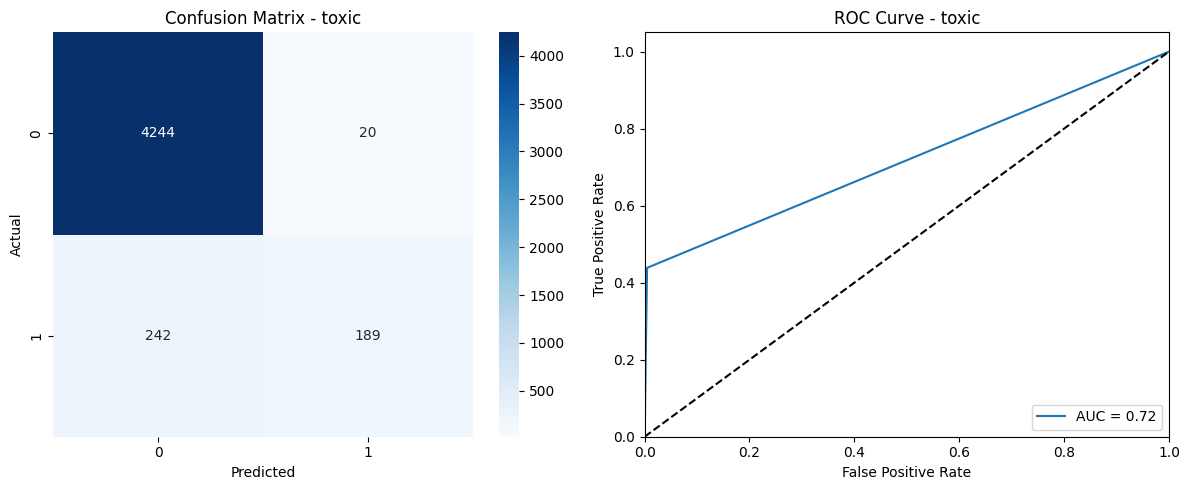

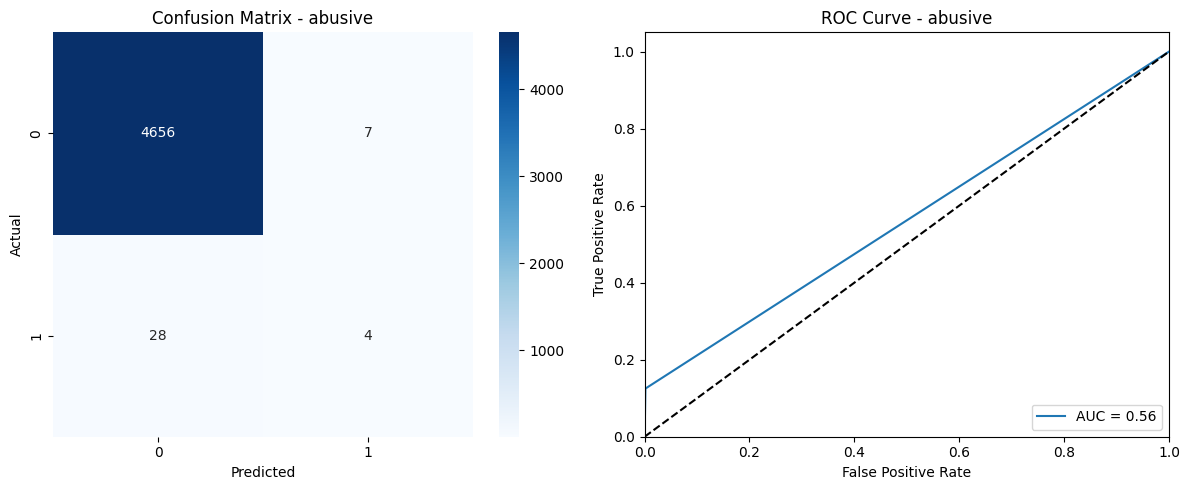

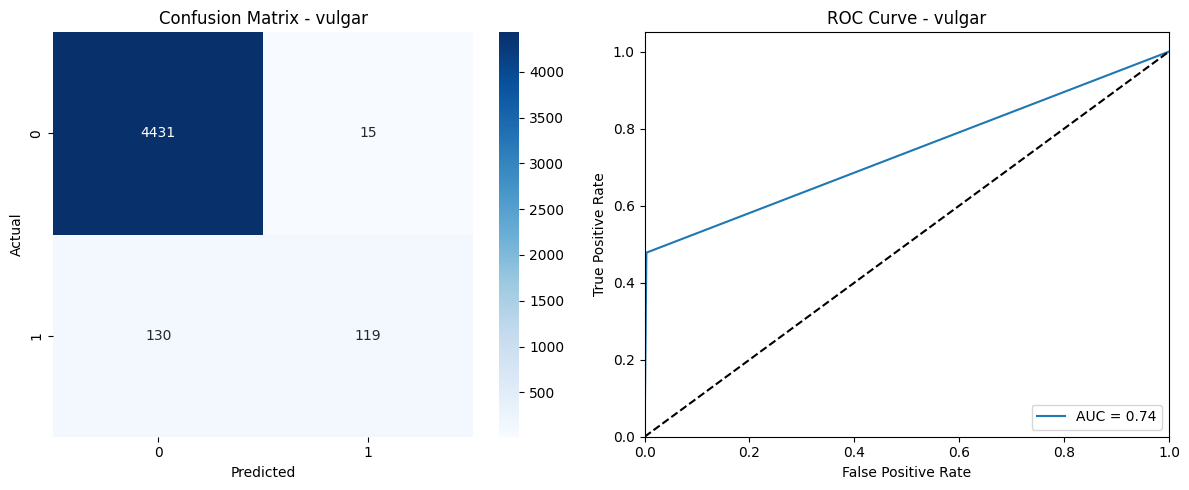

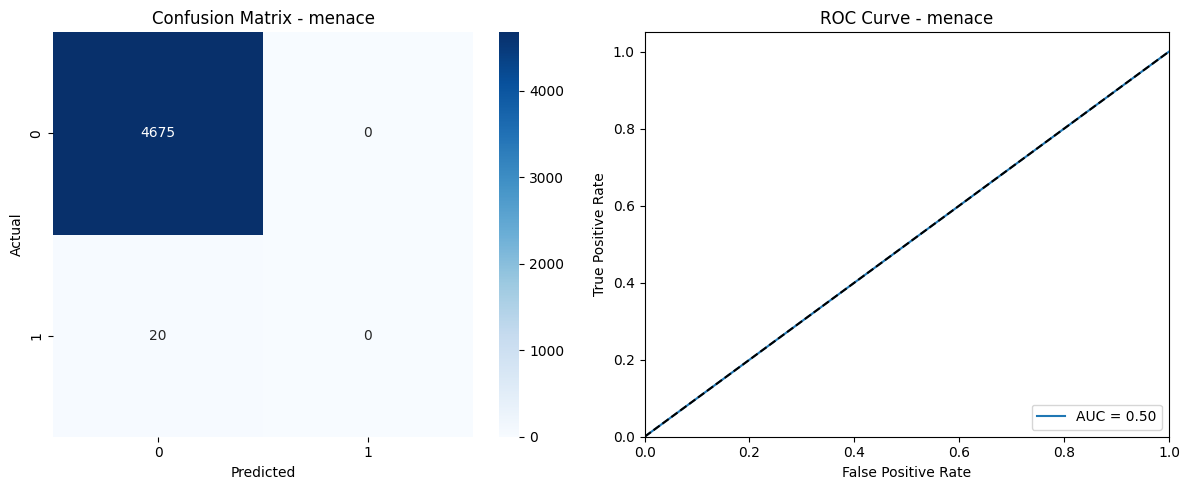

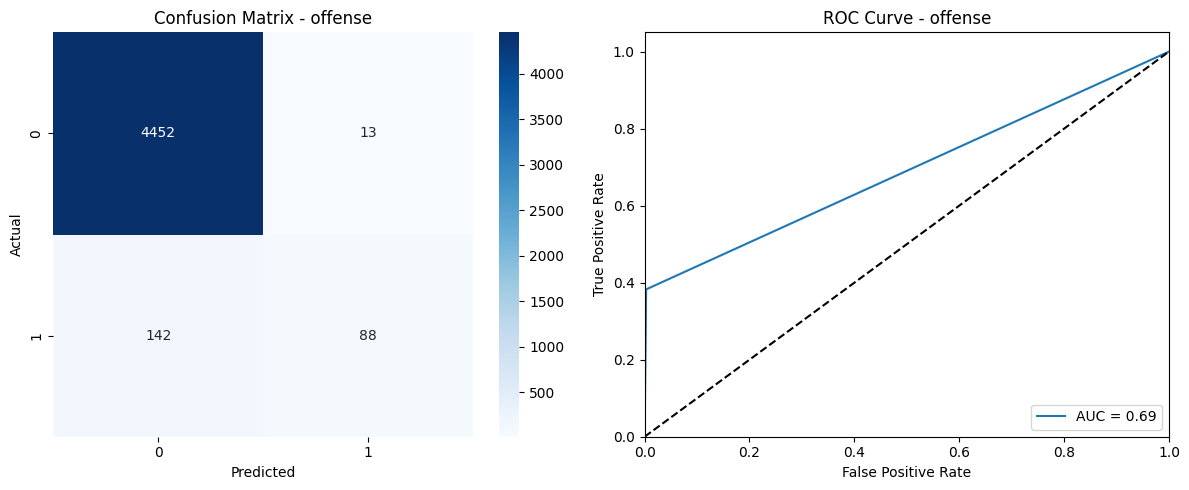

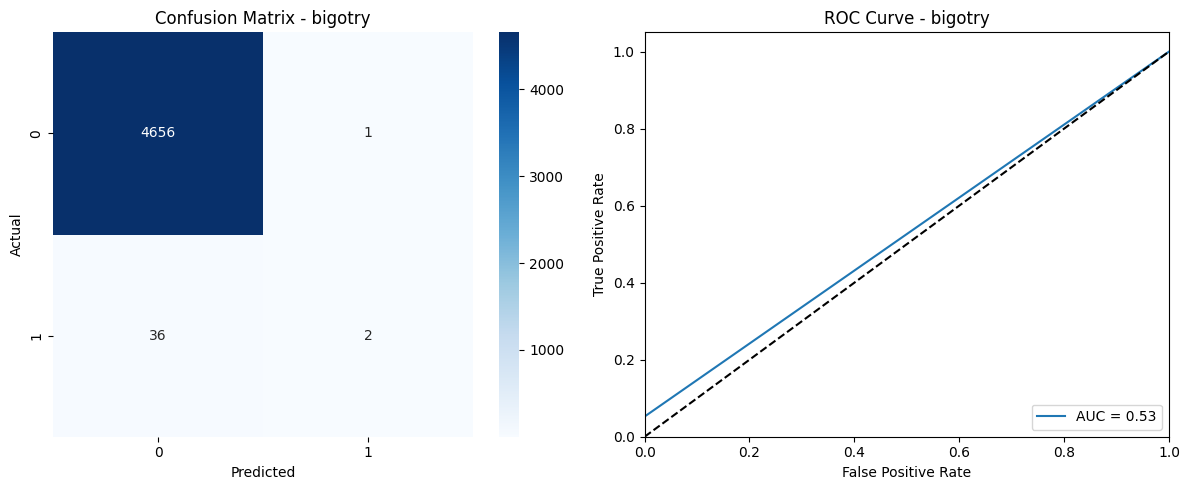

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Convert predicted probabilities to binary (if needed)
y_pred_binary = (y_pred_split > 0.5).astype(int)

# Plot confusion matrix and ROC for each label
for idx, label in enumerate(labels):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Confusion Matrix
    cm = confusion_matrix(y_val_split[label], y_pred_binary[:, idx])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
    ax[0].set_title(f'Confusion Matrix - {label}')
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('Actual')

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_val_split[label], y_pred_split[:, idx])
    roc_auc = auc(fpr, tpr)
    ax[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    ax[1].plot([0, 1], [0, 1], 'k--')
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_title(f'ROC Curve - {label}')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].legend(loc='lower right')

    plt.tight_layout()
    plt.show()


In [23]:
import pickle
filename = 'trained_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(multi_output_classifier, file)